# Load data

In [54]:
import pandas as pd

df = pd.read_csv('dataset1.csv', header = None)
print(df.columns)


Index([0, 1], dtype='int64')


# Initial 3d plots

In [55]:
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.graph_objects as go


def interactive_plot_centroids_and_clusters_3d(new_centroids, clusters, df, xlabel="X", ylabel="Y", zlabel="Z"):
    # Create the interactive plot for the original points (df)
    fig = px.scatter_3d(df, x=df.columns[0], y=df.columns[1], z=df.columns[2], title="K-means++ initilization with K=4 Clusters (Dataset2)")
    
    # Plot the centroids
    centroids = np.array(new_centroids)
    fig.add_trace(
        go.Scatter3d(
            x=centroids[:, 0],
            y=centroids[:, 1],
            z=centroids[:, 2],
            mode='markers',
            marker=dict(color='black', size=10, symbol='x'),
            name='Centroids'
        )
    )
    
    # Plot each cluster with different colors
    for i, centroid in enumerate(new_centroids):
        cluster_points = np.array(clusters[tuple(centroid)])
        if cluster_points.size > 0:
            fig.add_trace(
                go.Scatter3d(
                    x=cluster_points[:, 0],
                    y=cluster_points[:, 1],
                    z=cluster_points[:, 2],
                    mode='markers',
                    marker=dict(color=px.colors.qualitative.Set1[i], size=10),
                    name=f'Cluster {i+1}'
                )
            )

    # Update the layout with axis labels
    fig.update_layout(
        scene=dict(
            xaxis_title=xlabel,
            yaxis_title=ylabel,
            zaxis_title=zlabel
        )
    )

    # Show the plot
    fig.show()


# Initial 2d plots

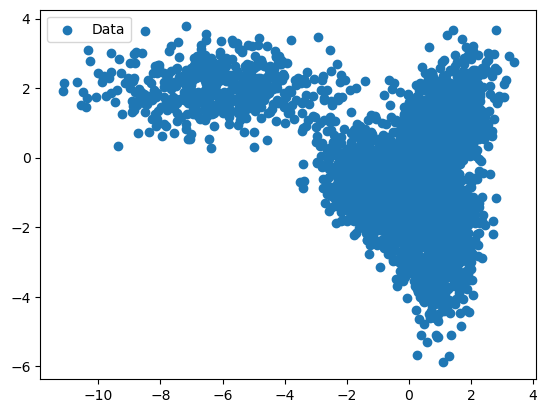

In [56]:
import matplotlib.pyplot as plt

def plot_initial_data(df):
    plt.scatter(df[0], df[1], label='Data', marker='o')
    plt.legend()
    plt.show()

plot_initial_data(df)


In [57]:
def initialize_first_centroid(df, fully_random=False):
    if fully_random:
        centroid = df.sample(1, ).values[0]
    centroid = df.sample(1, random_state=42).values[0]
    return tuple(centroid)


def euclidean_distance(x1, x2):

    if len(x1) != len(x2):
        raise ValueError('Both vectors must have the same length')
    
    summation = 0

    for i in range(len(x1)):
        summation += (x1[i] - x2[i])**2

    return summation**0.5


def check_centroids_within_threshold(new_centroids, previous_centroids, threshold):
    for new_centroid, prev_centroid in zip(new_centroids, previous_centroids):
        if euclidean_distance(new_centroid, prev_centroid) > threshold:
            return False
    return True


In [58]:
def find_closest_points(centroids, df):
    clusters = {}
    for point in centroids:
        clusters[tuple(point)] = []

    for datapoint in df.values:
        shortest_distance = float('inf')
        closest_centroid = None
        for centroid in centroids:
            distance = euclidean_distance(datapoint, centroid)
            if distance < shortest_distance:
                shortest_distance = distance
                closest_centroid = centroid
        clusters[tuple(closest_centroid)].append(datapoint)

    return clusters

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def plot_centroids_and_clusters(new_centroids, clusters):
    plt.figure(figsize=(8, 6))

    num_clusters = len(new_centroids)
    
    #For each cluster, get a color for it
    colors = plt.cm.rainbow(np.linspace(0, 1, len(new_centroids)))
    
    for i, centroid in enumerate(new_centroids):
        cluster_points = np.array(clusters[tuple(centroid)])
        if cluster_points.size > 0:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i])
    
    centroids = np.array(new_centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100)

    plt.title('K-means++ initilization with K={} Clusters (Dataset1)'.format(num_clusters))
    
    # Show the plot
    plt.show()


In [60]:
def squared_error(x1, x2):
    if len(x1) != len(x2):
        raise ValueError('Both vectors must have the same length')
    summation = 0
    for i in range(len(x1)):
        val = (x1[i] - x2[i])**2
        summation += val

    return summation

def compute_cost(clusters):

    cost = 0
    for key, value in clusters.items():
        for point in value:
            cost += squared_error(point, key)
    return cost            

In [61]:
import matplotlib.pyplot as plt

def plot_k_vs_cost(k_values, costs, title='K vs Cost'):
    plt.plot(k_values, costs, marker='o', linestyle='-', color='b')
    plt.title(title)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()


In [62]:
import random


def distance_to_nearest_centroid(centroids, df):
    point_distances = {}

    for datapoint in df.values:
        shortest_distance = float('inf')
        for centroid in centroids:

            distance = euclidean_distance(datapoint, centroid)
            if distance < shortest_distance:
                shortest_distance = distance
                closest_centroid = centroid
        point_distances[tuple(datapoint)] = shortest_distance
    return point_distances


def probaility_for_each_point(point_distances):

    probabilities = {}

    denom = sum(distance**2 for distance in point_distances.values())

    for point, distance in point_distances.items():
        probabilities[point] = distance**2 / denom

    return probabilities

def k_means_init(k, fully_random=False):

    centroids = []

    first_centroid = initialize_first_centroid(df, fully_random)

    centroids.append(first_centroid)

    for i in range(k-1):

        point_distances = distance_to_nearest_centroid(centroids, df)

        probabilities = probaility_for_each_point(point_distances)

        probabilities_list = list(probabilities.values())

        points = list(probabilities.keys())

        centroid = random.choices(points, weights=probabilities_list, k=1)

        centroids.append(centroid[0])

    return centroids

def lloyds_algorithm(df, k, centroids):       

    clusters = find_closest_points(centroids, df) 

    new_centroids = []

    for key, value in clusters.items():
        sum = 0
        for point in value:
            sum += point
        new_centroid = (sum/len(value)).tolist()
        new_centroids.append(new_centroid)

    return new_centroids

# Run algorithm with various k values

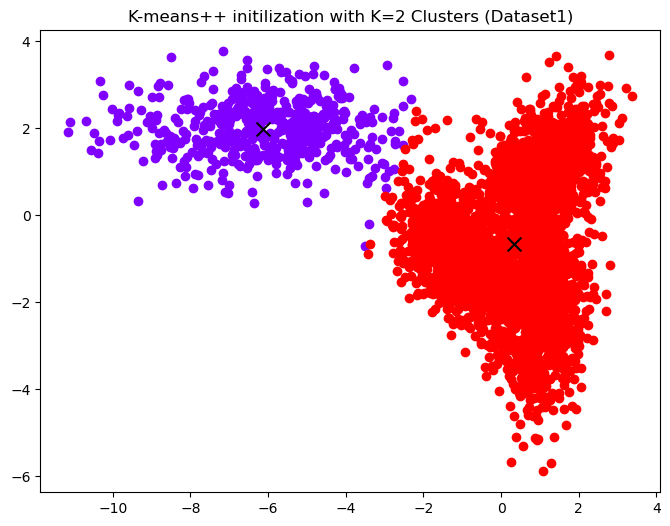

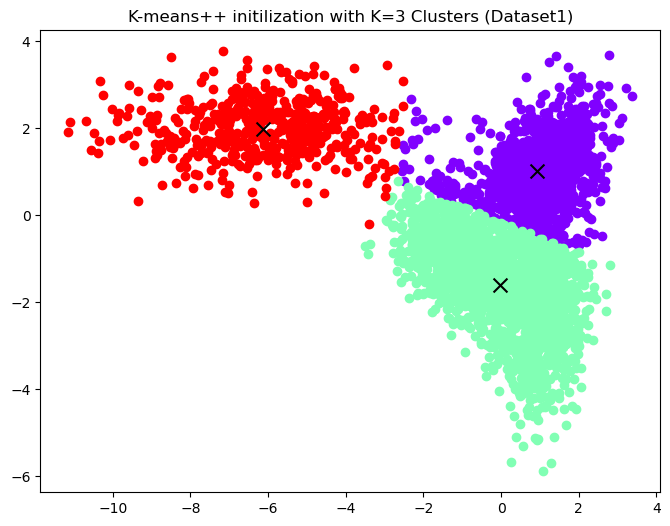

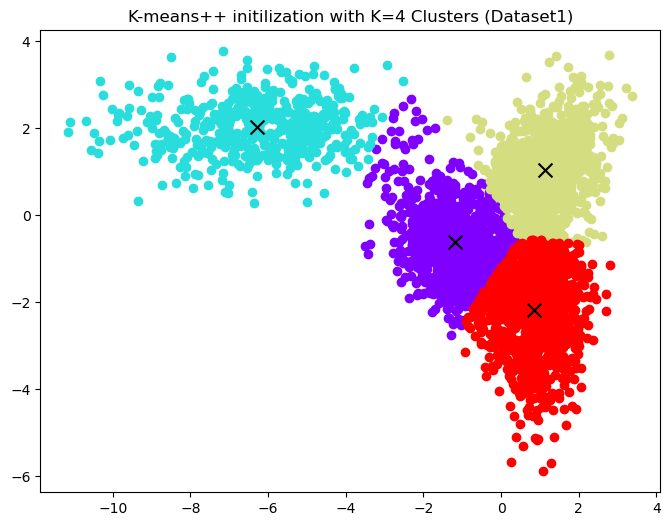

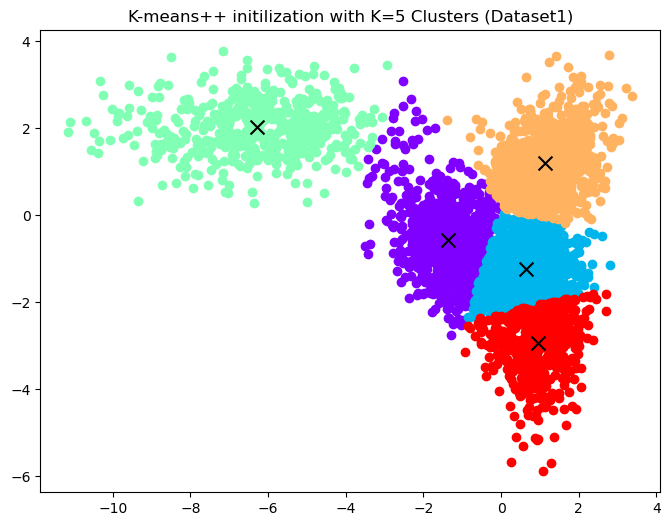

KeyboardInterrupt: 

In [63]:
k_values = [2, 3, 4, 5, 6, 7, 8, 9]

# k_values = [10]

    
costs = []

threshold = 0.01

for k in k_values:

    initial_centroids = k_means_init(k)

    new_centroids = lloyds_algorithm(df, 2, initial_centroids)

    for i in range(100):
        # plot_centroids_and_clusters(new_centroids, find_closest_points(new_centroids, df))
        previous_centroids = new_centroids
        new_centroids = lloyds_algorithm(df, 2, previous_centroids)
        if check_centroids_within_threshold(new_centroids, previous_centroids, threshold):
            break

    clusters = find_closest_points(new_centroids, df)
    plot_centroids_and_clusters(new_centroids, clusters)
    # interactive_plot_centroids_and_clusters_3d(new_centroids, clusters, df, xlabel="X", ylabel="Y", zlabel="Z")

    cost = compute_cost(clusters)
    costs.append(cost)


# plot_k_vs_cost(k_values, costs)

# Experiment for iterations to converge

Working on k = 2
Iteration number: 0
Iteration number: 1
Iteration number: 2
Iteration number: 3
Iteration number: 4
Iteration number: 5
Iteration number: 6
Iteration number: 7
Iteration number: 8
Iteration number: 9
Average costs: 13556.564313692157
Working on k = 3
Iteration number: 0
Iteration number: 1
Iteration number: 2
Iteration number: 3
Iteration number: 4
Iteration number: 5
Iteration number: 6
Iteration number: 7
Iteration number: 8
Iteration number: 9
Average costs: 8186.134420752996
Working on k = 4
Iteration number: 0
Iteration number: 1
Iteration number: 2
Iteration number: 3
Iteration number: 4
Iteration number: 5
Iteration number: 6
Iteration number: 7
Iteration number: 8
Iteration number: 9
Average costs: 5117.550131774878
Working on k = 5
Iteration number: 0
Iteration number: 1
Iteration number: 2
Iteration number: 3
Iteration number: 4
Iteration number: 5
Iteration number: 6
Iteration number: 7
Iteration number: 8
Iteration number: 9
Average costs: 4335.927981350298

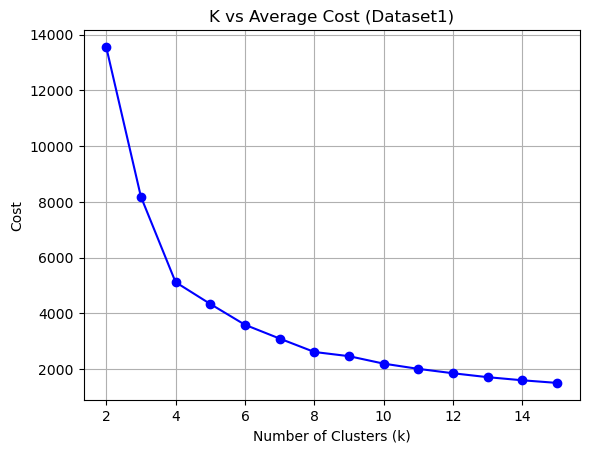

In [51]:
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

num_iterations_to_converge = []
    
costs = []

threshold = 0.01

number_iterations = 10

for k in k_values:

    print("Working on k =", k)  

    average_num_iterations = 0

    total_cost = 0

    for j in range(number_iterations):

        print("Iteration number:", j) 

        num_iterations = 0

        initial_centroids = k_means_init(k, fully_random=True)

        new_centroids = lloyds_algorithm(df, 2, initial_centroids)

        for i in range(100):
            # plot_centroids_and_clusters(new_centroids, find_closest_points(new_centroids, df))
            previous_centroids = new_centroids
            new_centroids = lloyds_algorithm(df, 2, previous_centroids)
            if check_centroids_within_threshold(new_centroids, previous_centroids, threshold):
                num_iterations = i
                break
        
        average_num_iterations += num_iterations

        clusters = find_closest_points(new_centroids, df)
        # plot_centroids_and_clusters(new_centroids, clusters)

        total_cost += compute_cost(clusters)
    
    print("Average costs:", total_cost/number_iterations)

    costs.append(total_cost/number_iterations)
    
    average_num_iterations /= number_iterations
    num_iterations_to_converge.append(average_num_iterations)

print("num_iterations_to_converge:", num_iterations_to_converge)

print("costs:", costs)

plot_k_vs_cost(k_values, costs, title='K vs Average Cost (Dataset1)')


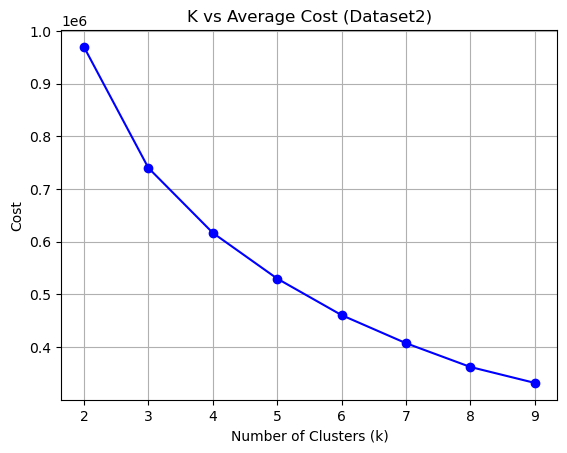

In [40]:
average_costs = [969428.2087761567, 739902.0322465069, 621288.3053323363, 530875.2543029118, 460379.31617357646, 408880.8443951083, 362841.7848694338, 336204.3088464072]
k = [2,3,4,5,6,7,8,9]

plot_k_vs_cost(k_values, costs, title='K vs Average Cost (Dataset2)')


# Working with num iterations

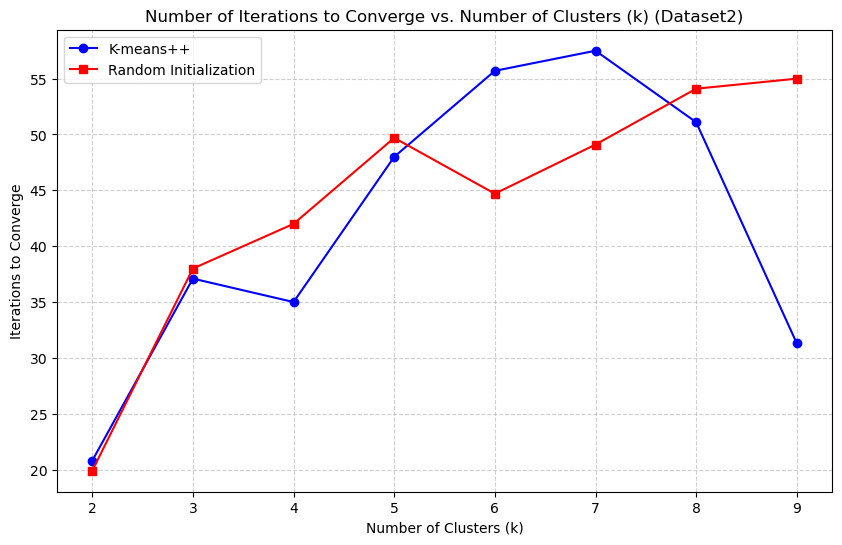

In [64]:
# num_iterations_to_converge_for_kpp = [5.48, 9.84, 7.04, 27.56, 20.96, 19.16, 20.68, 21.88, 29.16, 37.24, 27.8, 38.0, 27.12, 35.48]
num_iterations_to_converge_for_kpp_3d = [20.8, 37.1, 35.0, 48.0, 55.7, 57.5, 51.1, 31.3]
num_iterations_to_converge_ri_3d = [19.9, 38.0, 42.0, 49.7, 44.7, 49.1, 54.1, 55.0]



# num_iterations_to_converge_ri = [6.44, 8.84, 8.12, 28.16, 18.68, 25.12, 29.36, 32.88, 37.32, 45.96, 45.08, 50.6, 41.72, 49.0]

def plot_convergence_iterations(num_iterations_kpp, num_iterations_ri):
    k_values = range(2, len(num_iterations_kpp) + 2)  # Assuming k starts from 2

    plt.figure(figsize=(10, 6))

    plt.plot(k_values, num_iterations_kpp, marker='o', linestyle='-', color='blue', label='K-means++')
    plt.plot(k_values, num_iterations_ri, marker='s', linestyle='-', color='red', label='Random Initialization')

    plt.title('Number of Iterations to Converge vs. Number of Clusters (k) (Dataset2)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Iterations to Converge')

    plt.legend()

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

plot_convergence_iterations(num_iterations_to_converge_for_kpp_3d, num_iterations_to_converge_ri_3d)